In [1]:
import random
import matplotlib.pyplot as plt
import numpy as np
import cirq

def binary_labels(num_qubits):
    return [bin(x)[2:].zfill(num_qubits) for x in range(2**num_qubits)]
plt.rcParams.update({'font.size':8})

3-qubit phase flip error correcting code.

1. Encode
  - initialize a circuit with 3 qubits and 1 classical bit
  - Entangle the state of q0 with other qubits
  - Put all qubits in equal superpositions to correct $|+\rangle$ and $|-\rangle$ states from switching instead of $|0\rangle$ and $|1\rangle$.
2. Sending Over Noisy Channel
3. Error Detection
4. Error Correction
5. Decoding

<h1> Part 1 - Encode</h1>

In [2]:
qubits = cirq.NamedQubit.range(3, prefix="q")
encode_circuit = cirq.Circuit()

In [3]:
encode_circuit.append(cirq.CNOT(qubits[0], qubits[1]))
encode_circuit.append(cirq.CNOT(qubits[0], qubits[2]))

encode_circuit

q0: ───@───@───
       │   │
q1: ───X───┼───
           │
q2: ───────X───

In [4]:
encode_circuit.append(cirq.H.on_each(qubits))

encode_circuit

┌──┐
q0: ───@────@─────H───
       │    │
q1: ───X────┼H────────
            │
q2: ────────X─────H───
           └──┘

<h1>Part 2 - Send over noisy channel</h1>

In [5]:
noisy_channel_circuit = cirq.Circuit()

noisy_channel_circuit.append(cirq.Z(qubits[0]))

noisy_channel_circuit

q0: ───Z───

<h1>Part 3 - Error Detection</h1>

In [6]:
detection_circuit = cirq.Circuit()

detection_circuit.append(cirq.H.on_each(qubits))

detection_circuit.append(cirq.CNOT(qubits[0], qubits[1]))
detection_circuit.append(cirq.CNOT(qubits[0], qubits[2]))

detection_circuit

q0: ───H───@───@───
           │   │
q1: ───H───X───┼───
               │
q2: ───H───────X───

<h1>Part 4 - Error Correction</h1>

In [7]:
correction_circuit = cirq.Circuit()

correction_circuit.append(cirq.CCNOT(qubits[2], qubits[1], qubits[0]))

correction_circuit

q0: ───X───
       │
q1: ───@───
       │
q2: ───@───

<h1>Part 5 - Decoding</h1>

In [8]:
decode_circuit = cirq.Circuit()

decode_circuit.append(cirq.measure(qubits[0]))

decode_circuit

q0: ───M───

<h2>Now, let's simulate the results of performing each of these steps by adding the circuits together and simulating 100 times (to ensure our error correction code really works).</h2>

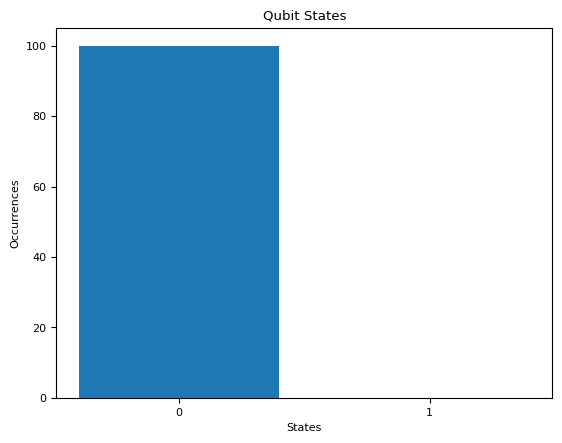

In [9]:
phaseflip_circuit = encode_circuit + noisy_channel_circuit + detection_circuit + correction_circuit + decode_circuit

sim = cirq.Simulator()

result = sim.run(phaseflip_circuit, repetitions = 100)


hist = cirq.plot_state_histogram(result, plt.subplot(), title = 'Qubit States', xlabel = 'States', ylabel = 'Occurrences', tick_label=binary_labels(1))

plt.show()

Using the code from above so that the logical qubit is in the $|+\rangle$ state instead of the $|0\rangle$ state.

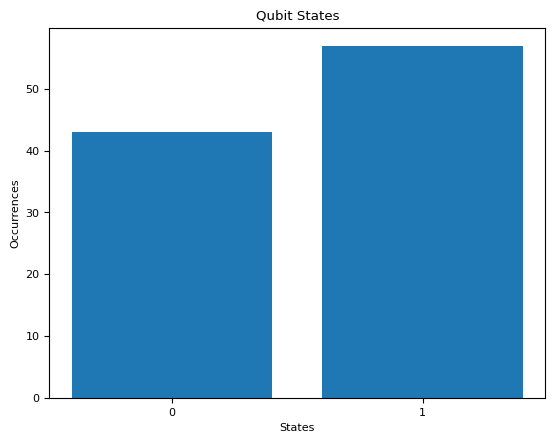

In [10]:
# PREPARATION
'''
In using real quantum computers, you would expect noise while applying gates,
so in order to protect that quantum information/circuit, you apply the H gate
after the encode_circuit part, during the noisy_channel_circuit so that any errors
during this part may be corrected. In simulation, it's okay to apply this first,
however with real quantum computers, this would not be best practice as the circuit
would be subject to noise.
'''
prepare_circuit = cirq.Circuit()
prepare_circuit.append(cirq.H(qubits[0]))

# SIMULATING
phaseflip_circuit = prepare_circuit + encode_circuit + noisy_channel_circuit + detection_circuit + correction_circuit + decode_circuit

sim = cirq.Simulator()
result = sim.run(phaseflip_circuit, repetitions = 100)

hist = cirq.plot_state_histogram(result, plt.subplot(), title = 'Qubit States', xlabel = 'States', ylabel = 'Occurrences', tick_label=binary_labels(1))

plt.show()

Adding a gate to $q_0$ right before decoding to rotate it's state into the computational basis so that we can be sure if the error has been corrected. 

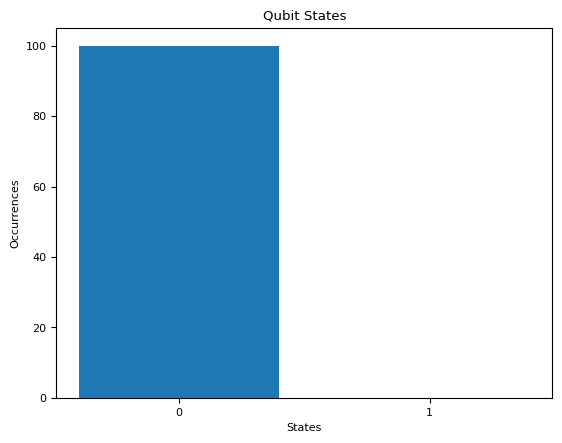

In [11]:
prepare_circuit = cirq.Circuit()
prepare_circuit.append(cirq.H(qubits[0]))

'''
We add an H gate after the correction circuit because we assume that after the
correction circuit, the 0 state will be in the |+> state because the H gate will make
the |+> into a 0 state. so now 100% of the time, we should recieve the the 0 state.
'''
# SIMULATING
phaseflip_circuit = prepare_circuit + encode_circuit + noisy_channel_circuit + detection_circuit + correction_circuit + cirq.H(qubits[0])+ decode_circuit

sim = cirq.Simulator()
result = sim.run(phaseflip_circuit, repetitions = 100)

hist = cirq.plot_state_histogram(result, plt.subplot(), title = 'Qubit States', xlabel = 'States', ylabel = 'Occurrences', tick_label=binary_labels(1))

plt.show()


Modified the code so that the logical qubit is in the $|0\rangle$ state, but there is a phase flip error on *both* $q_1$ and $q_2$.

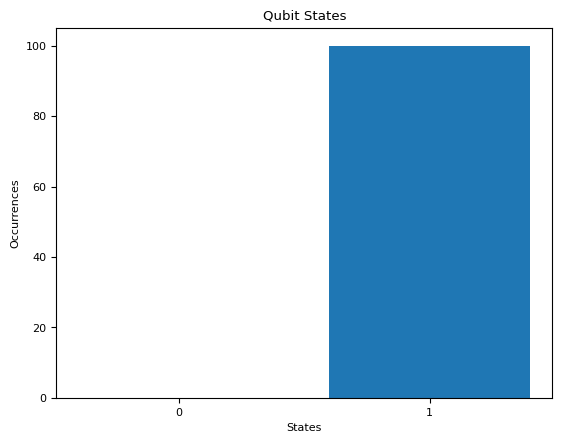

In [12]:
noisy_channel_circuit = cirq.Circuit()
noisy_channel_circuit.append(cirq.Z(qubits[1]))
noisy_channel_circuit.append(cirq.Z(qubits[2]))

'''
If we see that the answer ends up being 1 (or that all physical qubits incur errors
causing the logical qubit to be the wrong output) we can then conclude that the circuit
or QEC in this case is wrong, and it's back to the drawing board.
'''
# SIMULATING
phaseflip_circuit = encode_circuit + noisy_channel_circuit + detection_circuit + correction_circuit + decode_circuit

sim = cirq.Simulator()
result = sim.run(phaseflip_circuit, repetitions = 100)

hist = cirq.plot_state_histogram(result, plt.subplot(), title = 'Qubit States', xlabel = 'States', ylabel = 'Occurrences', tick_label=binary_labels(1))

plt.show()